# 📊 Lung Cancer Detection - EDA
# 🔍 Understanding the Dataset

# CSV FILE DATASET

In [4]:
#  Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set advanced visualization style
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (10, 5)  # Global figure size

# Step 2: Load the Dataset (Update File Path)
df = pd.read_csv("/kaggle/input/lung-cancer-csv/balanced_lung_cancer (1).csv")

# Step 3: Display Basic Info
print("\n✅ Dataset Overview:")
df.info()

#  Step 4: Check for Missing Values
print("\n🛑 Missing Values:\n", df.isnull().sum())

#  Step 5: Check for Duplicate Rows
print("\n🔍 Duplicate Rows:", df.duplicated().sum())

#  Step 6: Show First Few Rows
print("\n📊 First 5 Rows:\n", df.head())




✅ Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 540 non-null    object
 1   AGE                    540 non-null    int64 
 2   SMOKING                540 non-null    int64 
 3   YELLOW_FINGERS         540 non-null    int64 
 4   ANXIETY                540 non-null    int64 
 5   PEER_PRESSURE          540 non-null    int64 
 6   CHRONIC DISEASE        540 non-null    int64 
 7   FATIGUE                540 non-null    int64 
 8   ALLERGY                540 non-null    int64 
 9   WHEEZING               540 non-null    int64 
 10  ALCOHOL CONSUMING      540 non-null    int64 
 11  COUGHING               540 non-null    int64 
 12  SHORTNESS OF BREATH    540 non-null    int64 
 13  SWALLOWING DIFFICULTY  540 non-null    int64 
 14  CHEST PAIN             540 non-null    int64 
 15  LU

## Lung Cancer Class Distribution

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129729 (\N{LUNGS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


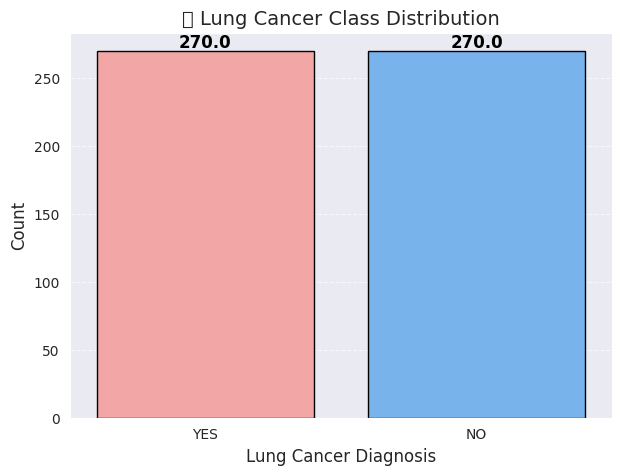

In [6]:
plt.figure(figsize=(7, 5))
colors = ["#ff9999", "#66b3ff"]
ax = sns.countplot(x=df["LUNG_CANCER"], palette=colors, edgecolor="black")

# Add data labels on bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.title("🫁 Lung Cancer Class Distribution", fontsize=14)
plt.xlabel("Lung Cancer Diagnosis", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Gender Distribution with Lung Cancer Cases

LUNG_CANCER   NO  YES
GENDER               
F            197  125
M             73  145


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129489 (\N{ADULT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


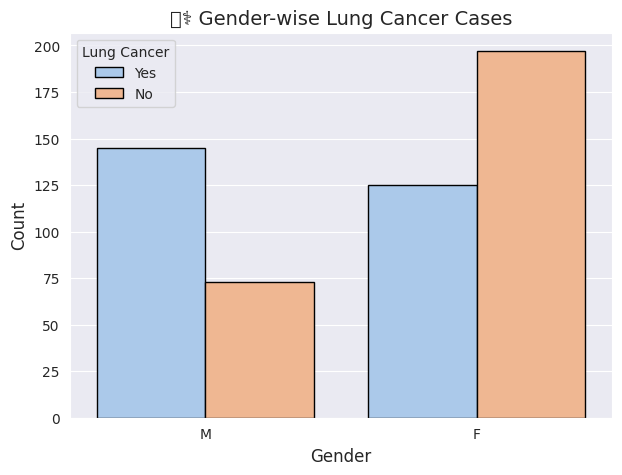

In [9]:
print(df.groupby(["GENDER", "LUNG_CANCER"]).size().unstack())

plt.figure(figsize=(7, 5))
colors = ["#a1c9f4", "#ffb482"]

# Create countplot
ax = sns.countplot(x="GENDER", hue="LUNG_CANCER", data=df, palette=colors, edgecolor="black")

# Fix the legend labels based on actual order in data
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=["Yes", "No"], title="Lung Cancer")

plt.title("🧑‍⚕️ Gender-wise Lung Cancer Cases", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()



## Age Distribution with KDE Curve

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


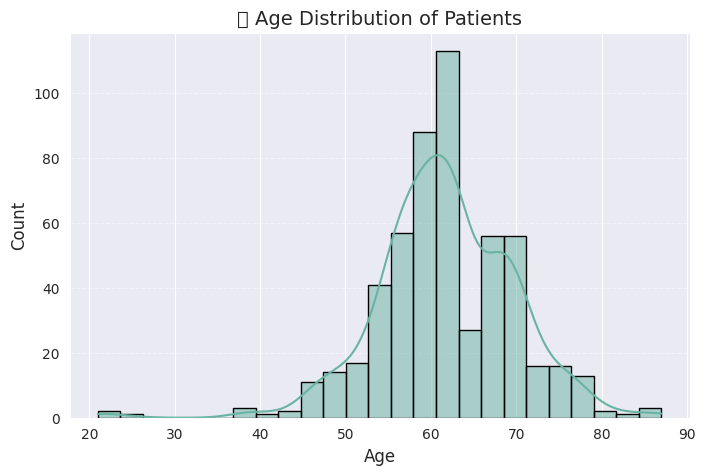

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df["AGE"], bins=25, kde=True, color="#69b3a2", edgecolor="black")
plt.title("📈 Age Distribution of Patients", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


## Correlation Heatmap 

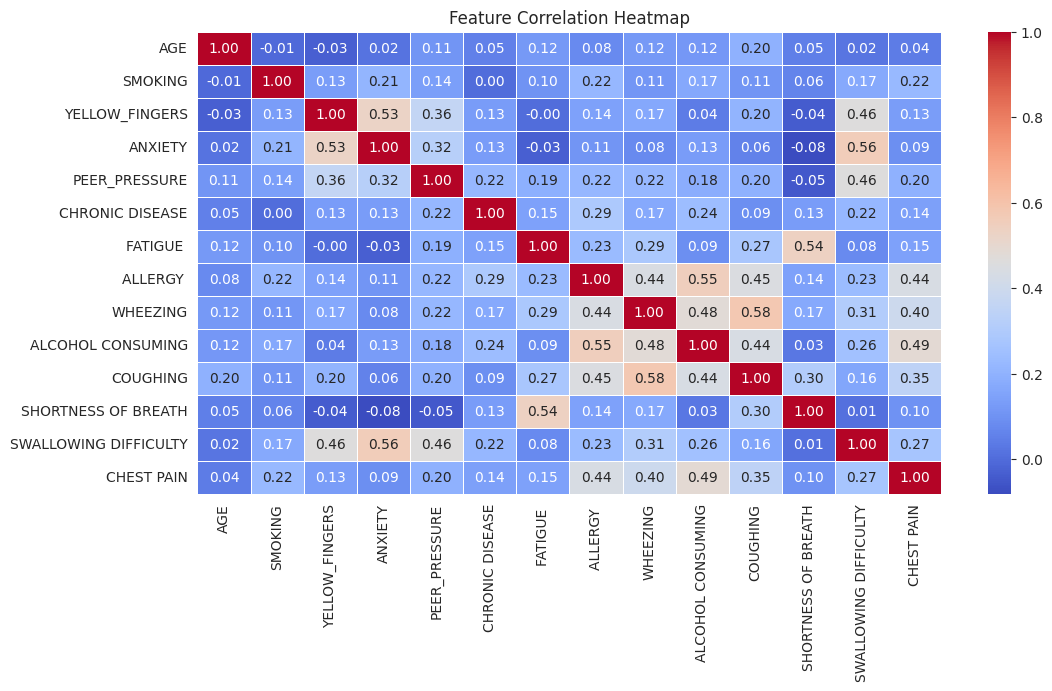

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.drop(columns=["GENDER", "LUNG_CANCER"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Lung Cancer vs. Smoking

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128684 (\N{SMOKING SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


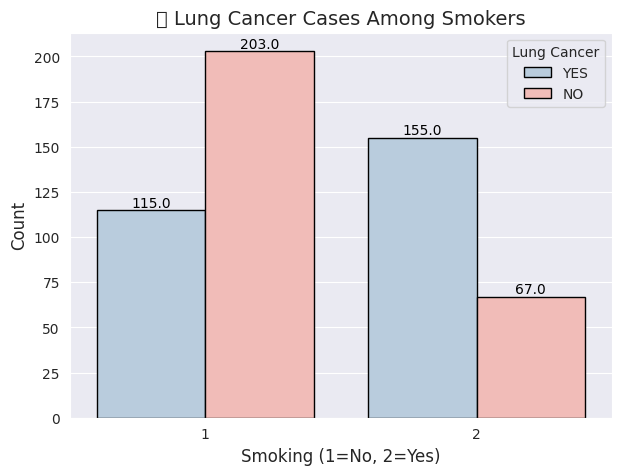

In [17]:
plt.figure(figsize=(7, 5))
colors = ["#b3cde3", "#fbb4ae"]

# Create countplot
ax = sns.countplot(x="SMOKING", hue="LUNG_CANCER", data=df, palette=colors, edgecolor="black")

# Auto-fix the legend order
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, title="Lung Cancer")

# Add data labels on bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=10, color="black")

plt.title("🚬 Lung Cancer Cases Among Smokers", fontsize=14)
plt.xlabel("Smoking (1=No, 2=Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

## Lung Cancer vs. Coughing

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129319 (\N{SNEEZING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


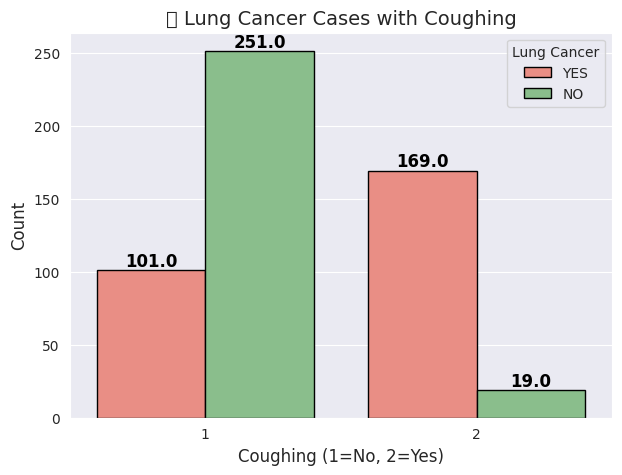

In [18]:
plt.figure(figsize=(7, 5))
colors = ["#fa8174", "#81c784"]

# Create countplot
ax = sns.countplot(x="COUGHING", hue="LUNG_CANCER", data=df, palette=colors, edgecolor="black")

# Auto-fix the legend order
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, title="Lung Cancer")  # Ensures correct label order

# Add data labels on bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.title("🤧 Lung Cancer Cases with Coughing", fontsize=14)
plt.xlabel("Coughing (1=No, 2=Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


In [20]:
print("\n📊 Summary Statistics:\n")
display(df.describe().T)



📊 Summary Statistics:



,count,mean,std,min,25%,50%,75%,max
AGE,540.0,61.737037,8.072797,21.0,57.0,62.0,68.0,87.0
SMOKING,540.0,1.411111,0.492492,1.0,1.0,1.0,2.0,2.0
YELLOW_FINGERS,540.0,1.400000,0.490352,1.0,1.0,1.0,2.0,2.0
ANXIETY,540.0,1.346296,0.476230,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,540.0,1.316667,0.465608,1.0,1.0,1.0,2.0,2.0
CHRONIC DISEASE,540.0,1.350000,0.477412,1.0,1.0,1.0,2.0,2.0
FATIGUE,540.0,1.509259,0.500378,1.0,1.0,2.0,2.0,2.0
ALLERGY,540.0,1.320370,0.467052,1.0,1.0,1.0,2.0,2.0
WHEEZING,540.0,1.329630,0.470515,1.0,1.0,1.0,2.0,2.0
ALCOHOL CONSUMING,540.0,1.329630,0.470515,1.0,1.0,1.0,2.0,2.0


# CT SCAN DATASET

## Import Required Libraries

In [3]:
# Import required libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image

# Set seaborn style for attractive plots
sns.set_style("whitegrid")
# Define dataset path 
DATASET_PATH = "/kaggle/input/ct-scan-lung-dataset"

# Define class directories
classes = ["Lung Cancer", "Normal"]
class_paths = {cls: os.path.join(DATASET_PATH, cls) for cls in classes}


## Class Distribution Visualization

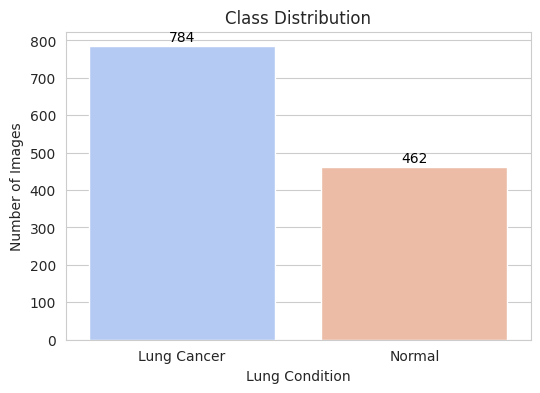

In [5]:
# Count number of images per class
data_distribution = {cls: len(os.listdir(class_paths[cls])) for cls in classes}

# Convert distribution to DataFrame for visualization
df_distribution = pd.DataFrame(list(data_distribution.items()), columns=["Class", "Count"])

# Display class distribution with data labels
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="Class", y="Count", data=df_distribution, palette="coolwarm")

# Add data labels (small text) on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 5,  # Position
            f'{int(p.get_height())}',  # Text (count)
            ha='center', va='bottom', fontsize=10, color='black')  # Alignment & Styling

# Set titles and labels
plt.title("Class Distribution")
plt.xlabel("Lung Condition")
plt.ylabel("Number of Images")
plt.show()


## Display Sample Images

🔍 Sample Images from Lung Cancer Class:


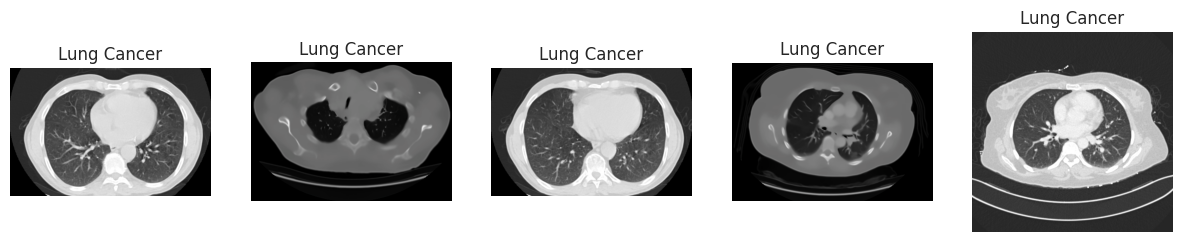


🔍 Sample Images from Normal Class:


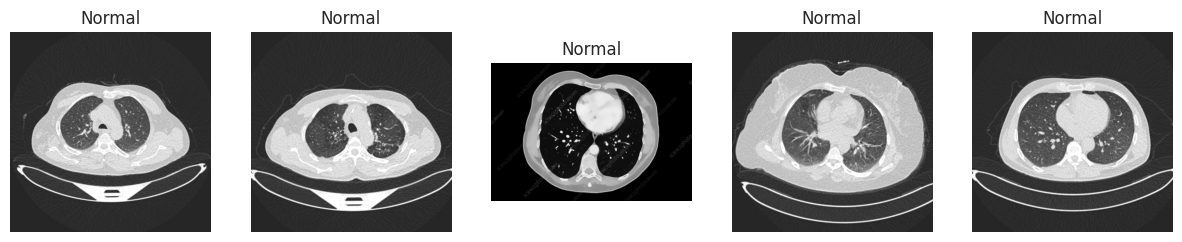

In [6]:
# Function to load and display sample images
def display_sample_images(class_name, num_samples=5):
    image_paths = glob(os.path.join(class_paths[class_name], "*"))
    sample_images = np.random.choice(image_paths, num_samples, replace=False)

    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(sample_images):
        img = Image.open(img_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
        plt.title(f"{class_name}")
    plt.show()

# Display sample images for both classes
print("🔍 Sample Images from Lung Cancer Class:")
display_sample_images("Lung Cancer")

print("\n🔍 Sample Images from Normal Class:")
display_sample_images("Normal")


## Image Shape Analysis

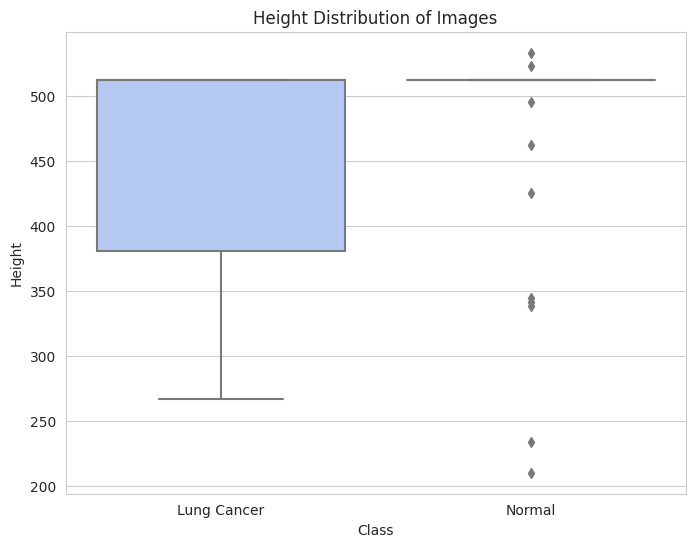

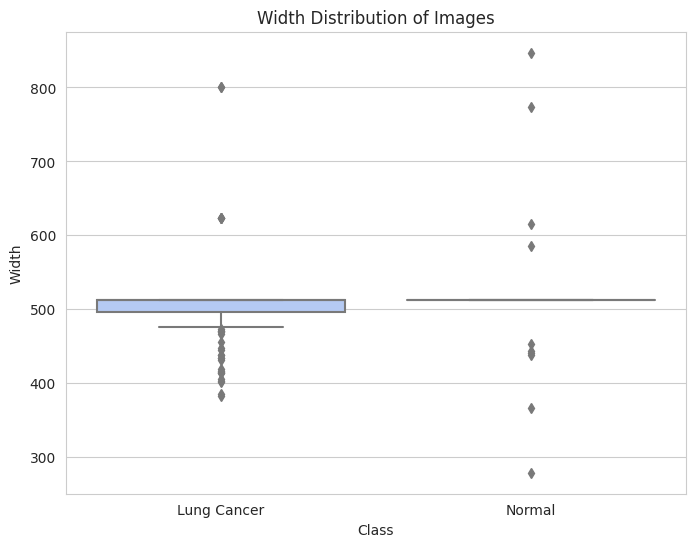

In [7]:
# Function to get image shape details
def get_image_shapes(class_name):
    image_paths = glob(os.path.join(class_paths[class_name], "*"))
    shapes = [cv2.imread(img).shape for img in image_paths[:100]]  # Checking only first 100 images for speed
    return pd.DataFrame(shapes, columns=["Height", "Width", "Channels"])

# Get image shape statistics
lung_cancer_shapes = get_image_shapes("Lung Cancer")
normal_shapes = get_image_shapes("Normal")

# Combine and visualize
shape_data = pd.concat([
    lung_cancer_shapes.assign(Class="Lung Cancer"),
    normal_shapes.assign(Class="Normal")
])

plt.figure(figsize=(8, 6))
sns.boxplot(x="Class", y="Height", data=shape_data, palette="coolwarm")
plt.title("Height Distribution of Images")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x="Class", y="Width", data=shape_data, palette="coolwarm")
plt.title("Width Distribution of Images")
plt.show()


## Pixel Intensity Histogram


📊 Pixel Intensity Distribution for Lung Cancer Images:


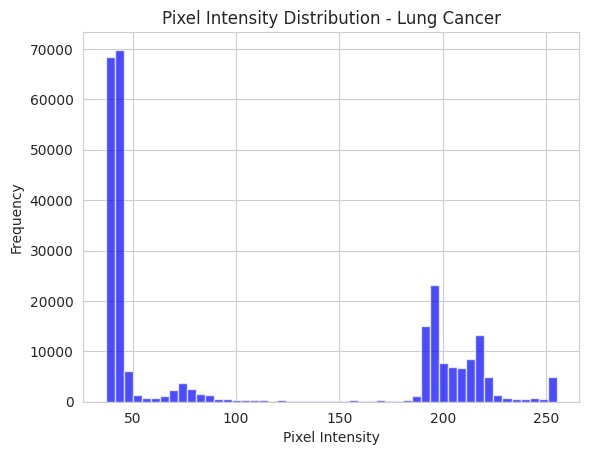


📊 Pixel Intensity Distribution for Normal Images:


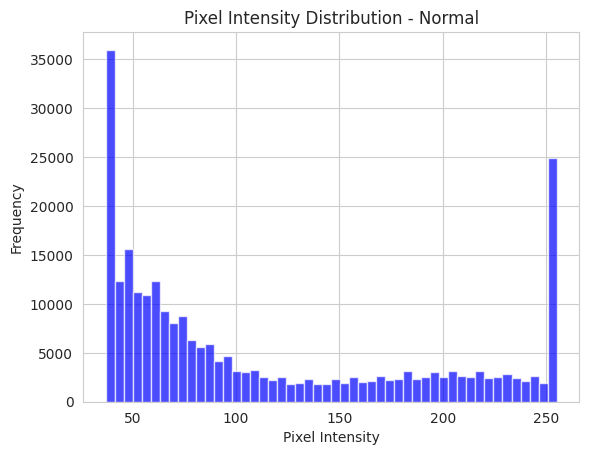

In [8]:
# Function to calculate average pixel intensity histogram
def plot_pixel_intensity(class_name):
    image_paths = glob(os.path.join(class_paths[class_name], "*"))
    img = cv2.imread(image_paths[0], cv2.IMREAD_GRAYSCALE)  # Load one image in grayscale
    plt.hist(img.ravel(), bins=50, color='blue', alpha=0.7)
    plt.title(f"Pixel Intensity Distribution - {class_name}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Show pixel intensity distribution
print("\n📊 Pixel Intensity Distribution for Lung Cancer Images:")
plot_pixel_intensity("Lung Cancer")

print("\n📊 Pixel Intensity Distribution for Normal Images:")
plot_pixel_intensity("Normal")


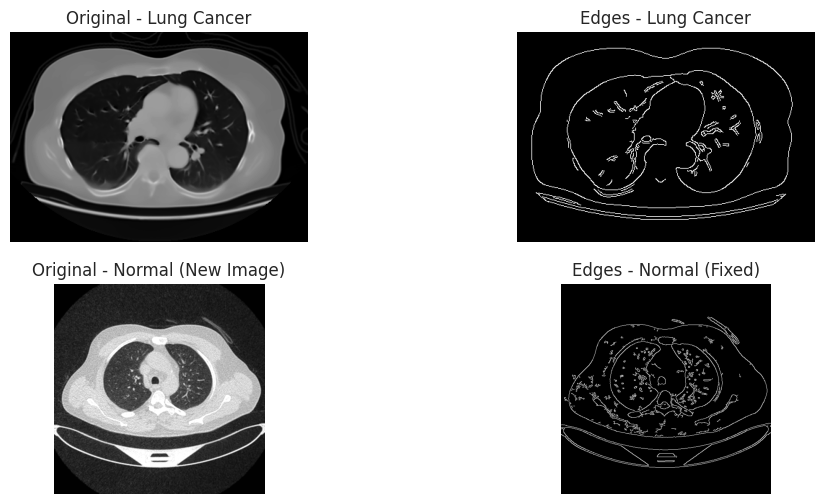

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import random

# Function to apply improved Canny Edge Detection
def plot_canny_edges():
    # Load random images from each class
    lung_cancer_img_path = random.choice(glob(os.path.join(class_paths["Lung Cancer"], "*")))
    normal_img_path = random.choice(glob(os.path.join(class_paths["Normal"], "*")))

    # Read images in grayscale
    lung_cancer_img = cv2.imread(lung_cancer_img_path, cv2.IMREAD_GRAYSCALE)
    normal_img = cv2.imread(normal_img_path, cv2.IMREAD_GRAYSCALE)

    # 🔹 Apply Canny Edge Detection directly
    lung_cancer_edges = cv2.Canny(lung_cancer_img, 80, 200)
    normal_edges = cv2.Canny(normal_img, 80, 200)

    # Plot Original & Edge-Detected Images Side-by-Side for Both Classes
    plt.figure(figsize=(12, 6))

    # Lung Cancer Images
    plt.subplot(2, 2, 1)
    plt.imshow(lung_cancer_img, cmap="gray")
    plt.title("Original - Lung Cancer")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(lung_cancer_edges, cmap="gray")
    plt.title("Edges - Lung Cancer")
    plt.axis("off")

    # Normal Images
    plt.subplot(2, 2, 3)
    plt.imshow(normal_img, cmap="gray")
    plt.title("Original - Normal (New Image)")
    plt.axis("off")

    plt.subplot(2, 2, 4)
    plt.imshow(normal_edges, cmap="gray")
    plt.title("Edges - Normal (Fixed)")
    plt.axis("off")

    plt.show()

# Run the function to display corrected results with a new Normal image
plot_canny_edges()


## X RAY IMAGES DATASET

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob
import random
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Set the style for visually appealing plots
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

In [8]:
# Cell 2: Load Dataset

# Define the base directory
base_dir = "/kaggle/input/lung-cancer-xray/xray-dataset-lung"

# Paths for the two classes
lung_cancer_dir = os.path.join(base_dir, "Lung Cancer X-ray")
normal_dir = os.path.join(base_dir, "Normal")

# Get all image files
lung_cancer_images = glob(os.path.join(lung_cancer_dir, "*.jpg")) + glob(os.path.join(lung_cancer_dir, "*.jpeg")) + glob(os.path.join(lung_cancer_dir, "*.png"))
normal_images = glob(os.path.join(normal_dir, "*.jpg")) + glob(os.path.join(normal_dir, "*.jpeg")) + glob(os.path.join(normal_dir, "*.png"))

print("="*50)
print("📊 DATASET OVERVIEW")
print("="*50)
print(f"Number of Lung Cancer X-ray images: {len(lung_cancer_images)}")
print(f"Number of Normal X-ray images: {len(normal_images)}")
print(f"Total number of images: {len(lung_cancer_images) + len(normal_images)}")

# Create a dataframe with image paths and labels
data = []
for img_path in lung_cancer_images:
    data.append([img_path, "Lung Cancer"])
for img_path in normal_images:
    data.append([img_path, "Normal"])

df = pd.DataFrame(data, columns=["Image Path", "Class"])
print("\nClass distribution:")
print(df["Class"].value_counts())

📊 DATASET OVERVIEW
Number of Lung Cancer X-ray images: 730
Number of Normal X-ray images: 1161
Total number of images: 1891

Class distribution:
Class
Normal         1161
Lung Cancer     730
Name: count, dtype: int64


### Class Distribution

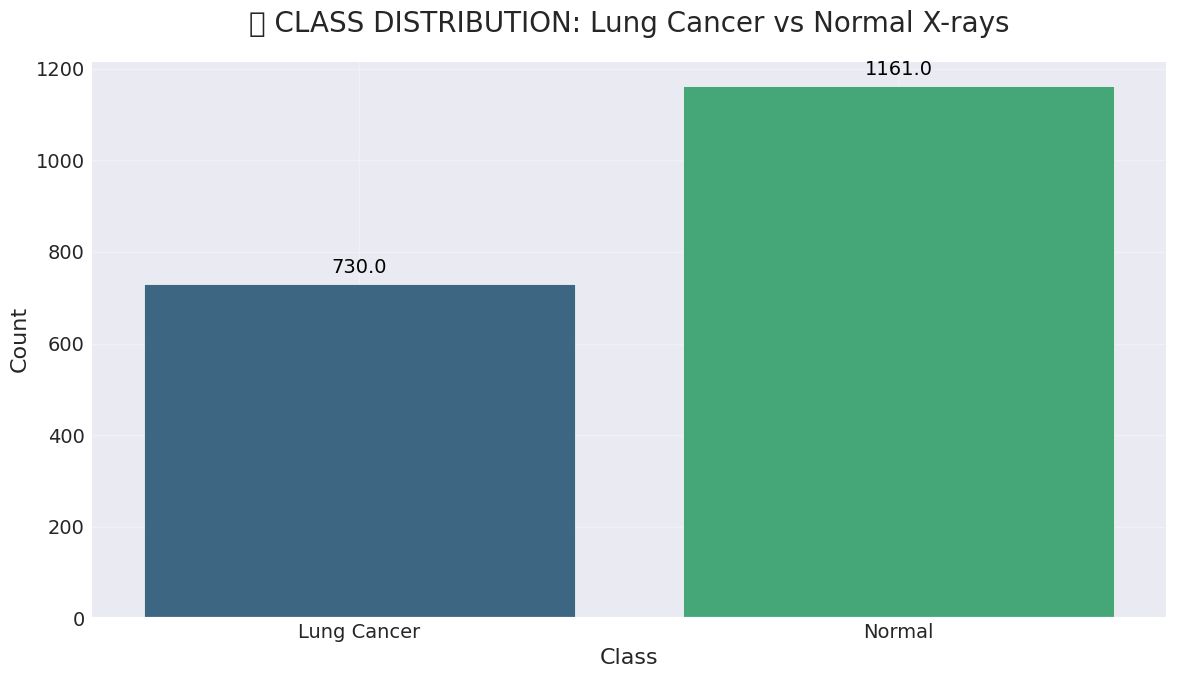

In [9]:
#  Class Distribution Visualization

plt.figure(figsize=(12, 7))
ax = sns.countplot(x='Class', data=df, palette='viridis')

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('📊 CLASS DISTRIBUTION: Lung Cancer vs Normal X-rays', fontsize=20, pad=20)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

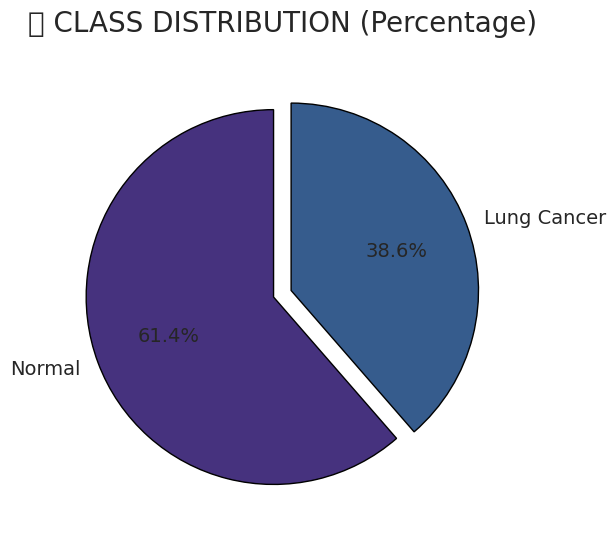

In [12]:
#  Class Distribution Pie Chart

plt.figure(figsize=(6, 6))
plt.pie(df['Class'].value_counts(), 
        labels=df['Class'].value_counts().index, 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=[0.05, 0.05],
        colors=sns.color_palette('viridis'), 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        textprops={'fontsize': 14})

plt.title('📊 CLASS DISTRIBUTION (Percentage)', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

In [13]:
# Cell 5: Define Image Utility Functions

def read_image(file_path, size=(224, 224)):
    """Read and preprocess an image"""
    img = cv2.imread(file_path)
    if img is None:
        print(f"Warning: Could not read image {file_path}")
        return np.zeros((size[0], size[1], 3), dtype=np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, size)
    return img

### Sample Image Visualization

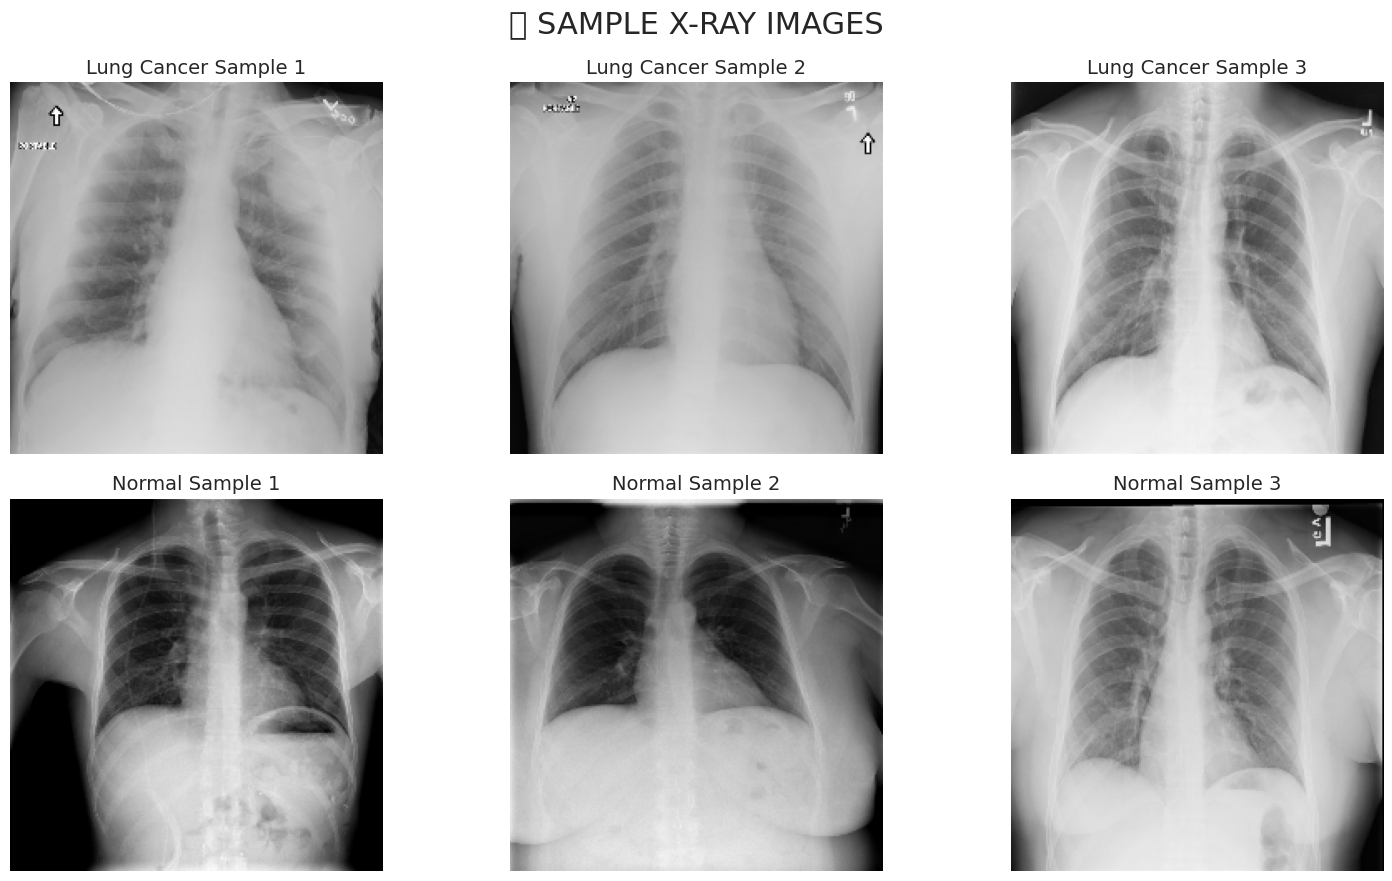

In [30]:
#  Display Sample Images

# Sample random images from each class
cancer_samples = random.sample(lung_cancer_images, min(3, len(lung_cancer_images)))
normal_samples = random.sample(normal_images, min(3, len(normal_images)))

# Create figure with heading
fig = plt.figure(figsize=(16, 9))
plt.suptitle('🔍 SAMPLE X-RAY IMAGES', fontsize=22, y=0.98)

# Display cancer samples
for i in range(3):
    if i < len(cancer_samples):
        plt.subplot(2, 3, i+1)
        img = read_image(cancer_samples[i])
        plt.imshow(img)
        plt.title(f"Lung Cancer Sample {i+1}", fontsize=14)
        plt.axis('off')

# Display normal samples
for i in range(3):
    if i < len(normal_samples):
        plt.subplot(2, 3, i+4)
        img = read_image(normal_samples[i])
        plt.imshow(img)
        plt.title(f"Normal Sample {i+1}", fontsize=14)
        plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### Image Properties

In [31]:
#  Analyze Image Properties

def get_image_properties(image_paths, sample_size=50):
    """Extract key properties from images"""
    # Sample paths if there are many images
    if len(image_paths) > sample_size:
        image_paths = random.sample(image_paths, sample_size)
    
    properties = {
        'widths': [],
        'heights': [],
        'intensity_means': [],
        'intensity_stds': []
    }
    
    for path in image_paths:
        img = read_image(path)
        properties['widths'].append(img.shape[1])
        properties['heights'].append(img.shape[0])
        properties['intensity_means'].append(np.mean(img))
        properties['intensity_stds'].append(np.std(img))
    
    return properties

# Get properties
cancer_props = get_image_properties(lung_cancer_images)
normal_props = get_image_properties(normal_images)

# Create dataframes for visualization
cancer_df = pd.DataFrame({
    'Width': cancer_props['widths'],
    'Height': cancer_props['heights'],
    'Mean Intensity': cancer_props['intensity_means'],
    'Std Intensity': cancer_props['intensity_stds'],
    'Class': ['Lung Cancer'] * len(cancer_props['widths'])
})

normal_df = pd.DataFrame({
    'Width': normal_props['widths'],
    'Height': normal_props['heights'],
    'Mean Intensity': normal_props['intensity_means'],
    'Std Intensity': normal_props['intensity_stds'],
    'Class': ['Normal'] * len(normal_props['widths'])
})

combined_df = pd.concat([cancer_df, normal_df])

# Print summary statistics
print("="*50)
print("📏 IMAGE PROPERTIES SUMMARY")
print("="*50)
print("Lung Cancer X-rays:")
print(f"  Width (mean ± std): {np.mean(cancer_props['widths']):.1f} ± {np.std(cancer_props['widths']):.1f} pixels")
print(f"  Height (mean ± std): {np.mean(cancer_props['heights']):.1f} ± {np.std(cancer_props['heights']):.1f} pixels")
print(f"  Intensity (mean ± std): {np.mean(cancer_props['intensity_means']):.1f} ± {np.std(cancer_props['intensity_means']):.1f}")

print("\nNormal X-rays:")
print(f"  Width (mean ± std): {np.mean(normal_props['widths']):.1f} ± {np.std(normal_props['widths']):.1f} pixels")
print(f"  Height (mean ± std): {np.mean(normal_props['heights']):.1f} ± {np.std(normal_props['heights']):.1f} pixels")
print(f"  Intensity (mean ± std): {np.mean(normal_props['intensity_means']):.1f} ± {np.std(normal_props['intensity_means']):.1f}")

📏 IMAGE PROPERTIES SUMMARY
Lung Cancer X-rays:
  Width (mean ± std): 224.0 ± 0.0 pixels
  Height (mean ± std): 224.0 ± 0.0 pixels
  Intensity (mean ± std): 154.4 ± 17.4

Normal X-rays:
  Width (mean ± std): 224.0 ± 0.0 pixels
  Height (mean ± std): 224.0 ± 0.0 pixels
  Intensity (mean ± std): 141.8 ± 22.9


### Mean Intensity Distribution Boxplot

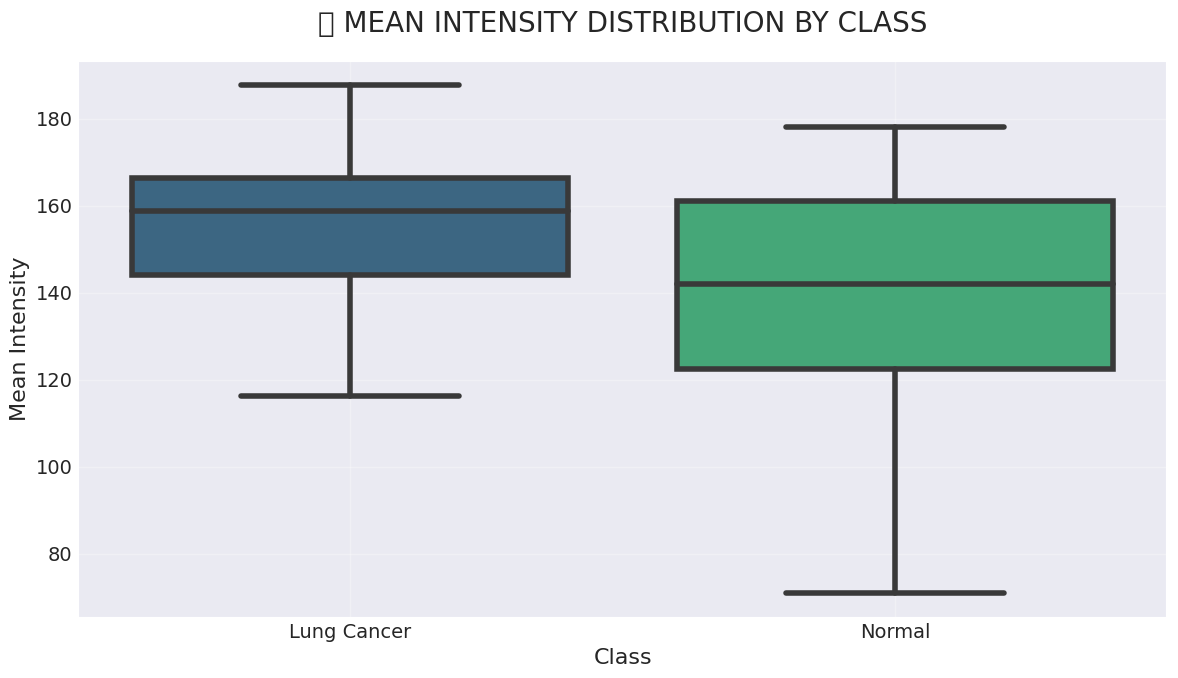

In [32]:
# Mean Intensity Distribution Boxplot

plt.figure(figsize=(12, 7))
sns.boxplot(x='Class', y='Mean Intensity', data=combined_df, palette='viridis')
plt.title('📊 MEAN INTENSITY DISTRIBUTION BY CLASS', fontsize=20, pad=20)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Mean Intensity', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

###  Intensity Histograms Comparison

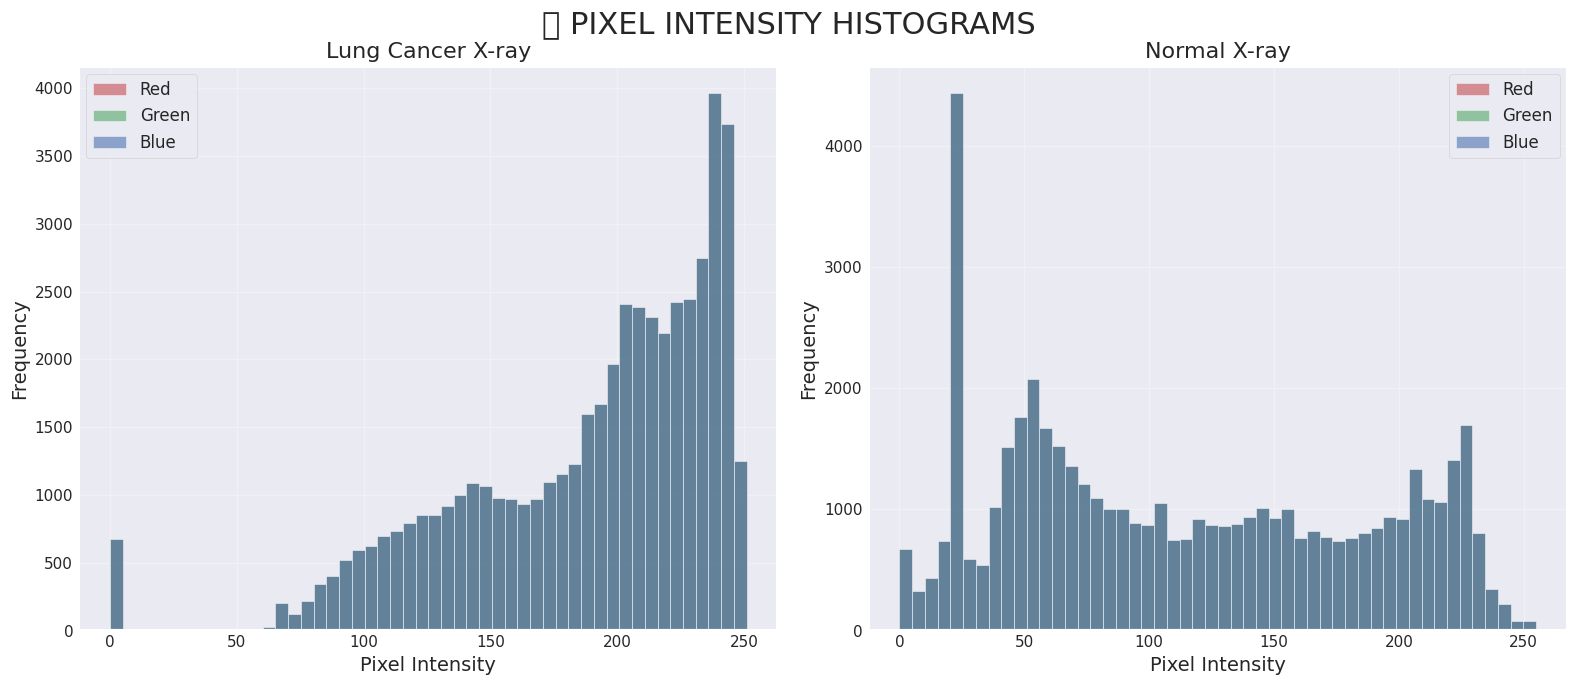

In [35]:


# Select sample images for histogram
cancer_sample = random.choice(lung_cancer_images)
normal_sample = random.choice(normal_images)

cancer_img = read_image(cancer_sample)
normal_img = read_image(normal_sample)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('📊 PIXEL INTENSITY HISTOGRAMS', fontsize=22, y=0.98)

# Cancer image histogram
axes[0].hist(cancer_img[:,:,0].flatten(), bins=50, alpha=0.6, color='r', label='Red')
axes[0].hist(cancer_img[:,:,1].flatten(), bins=50, alpha=0.6, color='g', label='Green')
axes[0].hist(cancer_img[:,:,2].flatten(), bins=50, alpha=0.6, color='b', label='Blue')
axes[0].set_title('Lung Cancer X-ray', fontsize=16)
axes[0].set_xlabel('Pixel Intensity', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True, alpha=0.3)

# Normal image histogram
axes[1].hist(normal_img[:,:,0].flatten(), bins=50, alpha=0.6, color='r', label='Red')
axes[1].hist(normal_img[:,:,1].flatten(), bins=50, alpha=0.6, color='g', label='Green')
axes[1].hist(normal_img[:,:,2].flatten(), bins=50, alpha=0.6, color='b', label='Blue')
axes[1].set_title('Normal X-ray', fontsize=16)
axes[1].set_xlabel('Pixel Intensity', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()